## LiH Dissociation Energy Curve with Classical Computation using PySCF 
Here we only use PySCF to calculate the LiH bond dissociation energy curve using different classical computational chemistry methods.


In [1]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from pyscf import gto, scf, dft
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

Numpy 1.16 has memory leak bug  https://github.com/numpy/numpy/issues/13808
It is recommended to downgrade to numpy 1.15 or older


### Define Molecule & Initializations
Initialize arrays to store energies and distances for plots

In [14]:
xax = []       # rhf distances
yax = []       # rhf energies
xax_uhf = []   # uhf distances
yax_uhf = []   # uhf energies
xax_dft = []   # dft distances
yax_dft = []   # dft energies

#mol = gto.Mole(atom='Li .0 .0 -0.25; H .0 .0 0.25', 
#               unit='Angstrom', 
#               basis='sto3g')

mol = gto.Mole()
mol.atom = [['H', (0.2, 0., 0.)], ['H', (0.,0.,0.)]]
mol.build()


print(mol.nelec)
print(mol.nelectron)


#dir(mol)

(1, 1)
2


#### ... Looking at some things

In [35]:
#mol.atom
#mol.atom[0][1][0]
#mol.atom[0][1]

test = scf.hf.RHF(mol)
test.kernel()
#dir(test)
print(test.mo_coeff)

array([[ 0.50441808,  3.78605257],
       [ 0.50441808, -3.78605257]])

converged SCF energy = 0.164175012061696


0.16417501206169627

[[ 0.50441808  3.78605257]
 [ 0.50441808 -3.78605257]]


NameError: name 'array' is not defined

In [32]:
test = scf.RHF(mol)
test.kernel()
print(test.mo_coeff[0])

converged SCF energy = 2.71588739329275


2.7158873932927516

[ 0.50112407 -7.46920715]


### RHF & UFH for range of energies

In [4]:
mf = scf.hf.RHF(mol)
mf.kernel()
xax.append(mol.atom[0][1][0])
yax.append(mf.e_tot)


mf = scf.uhf.UHF(mol)
mf.kernel()
xax_uhf.append(mol.atom[0][1][0])
yax_uhf.append(mf.e_tot)

dist = 0
dist_new = 0
for i in range(0,30):
    dist = mol.atom[0][1][0]
    dist_new = dist + 0.25
    mol.atom = [['H', (dist_new, 0., 0.)], ['H', (0., 0., 0.)]]
    mol = mol.build()
    # RHF
    mf = scf.hf.RHF(mol)
    mf.kernel()
    xax.append(dist_new)
    yax.append(mf.e_tot)
    # UHF
    mf = scf.uhf.UHF(mol)
    mf.kernel()
    xax_uhf.append(dist_new)
    yax_uhf.append(mf.e_tot)
    # DFT
    mf=scf.RKS(mol)
    mf.conv_tol=1e-12
    mf.conv_tol_grad=1e-8
    mf.direct_scf_tol=1e-13
    mf.init_guess='atom'
    mf.max_cycle=100
    mf.max_memory=8000
    #mf.verbose=0
    mf.xc='B3LYP'
    mf.grids.atom_grid=(50,194)
    mf.grids.becke_scheme=dft.gen_grid.original_becke
    mf.grids.prune=None
    mf.grids.radi_method=dft.radi.gauss_chebyshev
    mf.grids.radii_adjust=None
    mf.grids.verbose=4
    mf.small_rho_cutoff=1e-10
    mf.kernel()
    xax_dft.append(dist_new)
    yax_dft.append(mf.e_tot)
    

converged SCF energy = 2.80287805218654


Initialize <pyscf.gto.mole.Mole object at 0x7f7bf0402f98> in <pyscf.scf.hf.RHF object at 0x7f7bf041df60>


2.8028780521865357

converged SCF energy = 2.80287805218609  <S^2> = 6.4696692e-11  2S+1 = 1


2.80287805218609

converged SCF energy = -0.780454902071525


-0.7804549020715255

converged SCF energy = -0.780454902071526  <S^2> = 0  2S+1 = 1


-0.7804549020715259

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.816348028511481


-0.8163480285114806

converged SCF energy = -1.1011282422677


-1.1011282422677013

converged SCF energy = -1.1011282422677  <S^2> = -4.4408921e-16  2S+1 = 1


-1.1011282422677013

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -1.13923273858013


-1.139232738580125

converged SCF energy = -1.10251055392459


-1.1025105539245947

converged SCF energy = -1.10251055392459  <S^2> = 0  2S+1 = 1


-1.1025105539245947

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -1.14841144738455


-1.1484114473845526

converged SCF energy = -1.03653887502918


-1.0365388750291795

converged SCF energy = -1.03653887502918  <S^2> = 2.220446e-16  2S+1 = 1


-1.0365388750291795

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -1.09477439945451


-1.0947743994545083

converged SCF energy = -0.95720317507473


-0.9572031750747297

converged SCF energy = -0.95720317507473  <S^2> = 0  2S+1 = 1


-0.95720317507473

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -1.03113563074805


-1.031135630748047

converged SCF energy = -0.881732449946056


-0.8817324499460559

converged SCF energy = -0.881732449946056  <S^2> = 6.6613381e-16  2S+1 = 1


-0.8817324499460559

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.972720377229483


-0.9727203772294835

converged SCF energy = -0.816842292250873


-0.8168422922508728

converged SCF energy = -0.816842292250873  <S^2> = 0  2S+1 = 1


-0.816842292250873

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.924351168276952


-0.9243511682769524

converged SCF energy = -0.764177651616797


-0.7641776516167966

converged SCF energy = -0.764177651616797  <S^2> = 0  2S+1 = 1


-0.7641776516167966

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.886562250873291


-0.8865622508732913

converged SCF energy = -0.7229390719684


-0.7229390719684001

converged SCF energy = -0.7229390719684  <S^2> = 2.220446e-16  2S+1 = 1


-0.7229390719684003

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.858153309872924


-0.8581533098729245

converged SCF energy = -0.691327561197377


-0.6913275611973775

converged SCF energy = -0.691327561197377  <S^2> = 0  2S+1 = 1


-0.691327561197377

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.837336060688475


-0.8373360606884745

converged SCF energy = -0.667417245694688


-0.6674172456946882

converged SCF energy = -0.667417245694688  <S^2> = 0  2S+1 = 1


-0.6674172456946881

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.822379453934063


-0.8223794539340628

converged SCF energy = -0.649505775890185


-0.6495057758901853

converged SCF energy = -0.649505775890185  <S^2> = -4.4408921e-16  2S+1 = 1


-0.6495057758901852

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.811846710782311


-0.8118467107823112

converged SCF energy = -0.636152463434401


-0.6361524634344013

converged SCF energy = -0.636152463434401  <S^2> = 4.4408921e-16  2S+1 = 1


-0.6361524634344015

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.804577218567662


-0.8045772185676624

converged SCF energy = -0.626159758066403


-0.6261597580664031

converged SCF energy = -0.626159758066403  <S^2> = 4.4408921e-16  2S+1 = 1


-0.6261597580664031

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.799634095236864


-0.7996340952368644

converged SCF energy = -0.618573708294092


-0.6185737082940921

converged SCF energy = -0.618573708294092  <S^2> = -4.4408921e-16  2S+1 = 1


-0.6185737082940923

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.79628689108605


-0.7962868910860501

converged SCF energy = -0.612677467222809


-0.6126774672228088

converged SCF energy = -0.612677467222809  <S^2> = -4.4408921e-16  2S+1 = 1


-0.6126774672228088

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.793998910705766


-0.7939989107057661

converged SCF energy = -0.607960639251252


-0.6079606392512517

converged SCF energy = -0.607960639251252  <S^2> = 4.4408921e-16  2S+1 = 1


-0.6079606392512515

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.792397469148484


-0.7923974691484843

converged SCF energy = -0.604073578627504


-0.6040735786275035

converged SCF energy = -0.604073578627504  <S^2> = 0  2S+1 = 1


-0.6040735786275035

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.791237703957446


-0.7912377039574464

converged SCF energy = -0.600781734078478


-0.6007817340784777

converged SCF energy = -0.600781734078477  <S^2> = 0  2S+1 = 1


-0.6007817340784775

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.790361480276365


-0.7903614802763653

converged SCF energy = -0.597928683110515


-0.5979286831105145

converged SCF energy = -0.597928683110514  <S^2> = 0  2S+1 = 1


-0.5979286831105143

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.789670027110215


-0.7896700271102146

converged SCF energy = -0.595409560740627


-0.5954095607406272

converged SCF energy = -0.595409560740627  <S^2> = 0  2S+1 = 1


-0.5954095607406273

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.789101145232769


-0.7891011452327686

converged SCF energy = -0.593153126489896


-0.5931531264898965

converged SCF energy = -0.593153126489897  <S^2> = 0  2S+1 = 1


-0.5931531264898967

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.788615938975542


-0.7886159389755425

converged SCF energy = -0.591109989793387


-0.591109989793387

converged SCF energy = -0.591109989793387  <S^2> = 4.4408921e-16  2S+1 = 1


-0.5911099897933868

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.788190314044799


-0.7881903140447991

converged SCF energy = -0.589244954191382


-0.5892449541913816

converged SCF energy = -0.589244954191381  <S^2> = 0  2S+1 = 1


-0.5892449541913815

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.787809407257908


-0.7878094072579084

converged SCF energy = -0.587532071908982


-0.5875320719089825

converged SCF energy = -0.587532071908982  <S^2> = -4.4408921e-16  2S+1 = 1


-0.5875320719089825

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.787462786165199


-0.7874627861651992

converged SCF energy = -0.585951482404405


-0.5859514824044054

converged SCF energy = -0.585951482404405  <S^2> = 0  2S+1 = 1


-0.5859514824044054

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.787145284846413


-0.7871452848464129

converged SCF energy = -0.584487418336501


-0.5844874183365008

converged SCF energy = -0.584487418336501  <S^2> = -4.4408921e-16  2S+1 = 1


-0.584487418336501

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.786852020874444


-0.7868520208744441

converged SCF energy = -0.583126960737296


-0.5831269607372956

converged SCF energy = -0.583126960737296  <S^2> = 8.8817842e-16  2S+1 = 1


-0.5831269607372958

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.786579322247388


-0.786579322247388

converged SCF energy = -0.581859261204807


-0.5818592612048068

converged SCF energy = -0.581859261204826  <S^2> = 1.0280665e-13  2S+1 = 1


-0.5818592612048265

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.786325756387066


-0.7863257563870658

converged SCF energy = -0.580675046688089


-0.580675046688089

converged SCF energy = -0.580675046688089  <S^2> = 2.220446e-16  2S+1 = 1


-0.5806750466880893

radial grids: Gauss-Chebyshev (JCP, 108, 3226) radial grids
becke partition: Becke, JCP, 88, 2547 (1988)
pruning grids: None
grids dens level: 3
symmetrized grids: False
User specified grid scheme (50, 194)
tot grids = 19400
converged SCF energy = -0.786089285308322


-0.7860892853083222

In [6]:
xax
xax_dft

[0.1,
 0.35,
 0.6,
 0.85,
 1.1,
 1.35,
 1.6,
 1.85,
 2.1,
 2.35,
 2.6,
 2.85,
 3.1,
 3.35,
 3.6,
 3.85,
 4.1,
 4.35,
 4.6,
 4.85,
 5.1,
 5.35,
 5.6,
 5.85,
 6.1,
 6.35,
 6.6,
 6.85,
 7.1,
 7.35,
 7.6]

[0.35,
 0.6,
 0.85,
 1.1,
 1.35,
 1.6,
 1.85,
 2.1,
 2.35,
 2.6,
 2.85,
 3.1,
 3.35,
 3.6,
 3.85,
 4.1,
 4.35,
 4.6,
 4.85,
 5.1,
 5.35,
 5.6,
 5.85,
 6.1,
 6.35,
 6.6,
 6.85,
 7.1,
 7.35,
 7.6]

In [11]:
yax


[2.8028780521865357,
 -0.7804549020715255,
 -1.1011282422677013,
 -1.1025105539245947,
 -1.0365388750291795,
 -0.9572031750747297,
 -0.8817324499460559,
 -0.8168422922508728,
 -0.7641776516167966,
 -0.7229390719684001,
 -0.6913275611973775,
 -0.6674172456946882,
 -0.6495057758901853,
 -0.6361524634344013,
 -0.6261597580664031,
 -0.6185737082940921,
 -0.6126774672228088,
 -0.6079606392512517,
 -0.6040735786275035,
 -0.6007817340784777,
 -0.5979286831105145,
 -0.5954095607406272,
 -0.5931531264898965,
 -0.591109989793387,
 -0.5892449541913816,
 -0.5875320719089825,
 -0.5859514824044054,
 -0.5844874183365008,
 -0.5831269607372956,
 -0.5818592612048068,
 -0.580675046688089]

Text(0.5, 0, 'distance (Angstrom)')

Text(0, 0.5, 'energy (Hartree)')

Text(0.5, 1.0, 'LiH Dissociation Curve')

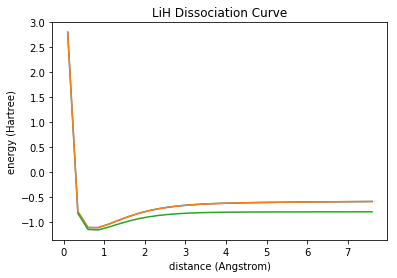

In [17]:
fig, main_ax = plt.subplots()
main_ax.plot(xax,yax)
main_ax.plot(xax,yax_uhf)
main_ax.plot(xax_dft,yax_dft)
#main_ax.set_xlim(0.5, 8.0)
#main_ax.set_ylim(-7.06062, -7.0606)
main_ax.set_xlabel('distance (Angstrom)')
main_ax.set_ylabel('energy (Hartree)')
main_ax.set_title('LiH Dissociation Curve')

plt.show()



### DFT 

In [ ]:
print("RUNNING DFT CALCULATION============")

###
### PySCF: calculate energy using DFT
###
m_f2=scf.RKS(mol)

m_f2.conv_tol=1e-12
m_f2.conv_tol_grad=1e-8
m_f2.direct_scf_tol=1e-13
m_f2.init_guess='atom'
m_f2.max_cycle=100
m_f2.max_memory=8000
m_f2.verbose=0

m_f2.xc='B3LYP'
m_f2.grids.atom_grid=(50,194)
m_f2.grids.becke_scheme=dft.gen_grid.original_becke
m_f2.grids.prune=None
m_f2.grids.radi_method=dft.radi.gauss_chebyshev
m_f2.grids.radii_adjust=None
m_f2.grids.verbose=4
m_f2.small_rho_cutoff=1e-10

m_f2.kernel()

